In [57]:
"These are a library for my model"
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [58]:
path = "/content/Mall_Customers.csv"

In [59]:
"this chapter to show my data"
customer = pd.read_csv(path)
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


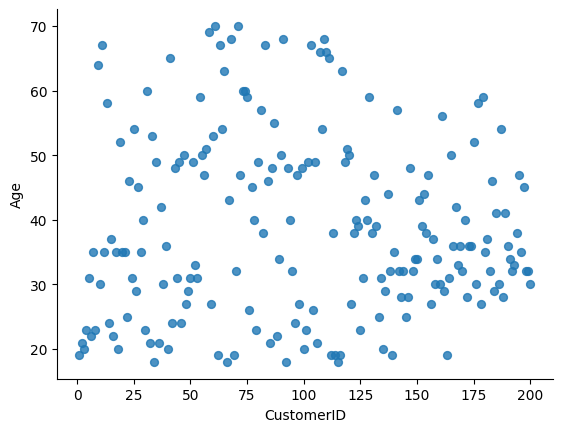

In [60]:
"""
to show how to distribute of points in my data , subpose that we want to divide based on the age ...
"""
customer.plot(kind='scatter', x='CustomerID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [61]:
"""
in this chapter :
we drop the column that we divide on based it ,
pre-trained the data and replace [male as 1 , and female as 0] to train the model without any problem ...
"""

K_mean = customer.drop('Age', axis=1)

K_mean.replace(['Male', 'Female'], [1,0], inplace=True)

K_mean.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,1,1,15,39
1,2,1,15,81
2,3,0,16,6
3,4,0,16,77
4,5,0,17,40


In [39]:
"pre-processing data with StandardScaler"
from sklearn.preprocessing import StandardScaler
X = K_mean.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.12815215, -1.73899919, -0.43480148],
       [ 1.12815215, -1.73899919,  1.19570407],
       [-0.88640526, -1.70082976, -1.71591298],
       [-0.88640526, -1.70082976,  1.04041783],
       [-0.88640526, -1.66266033, -0.39597992],
       [-0.88640526, -1.66266033,  1.00159627],
       [-0.88640526, -1.62449091, -1.71591298],
       [-0.88640526, -1.62449091,  1.70038436],
       [ 1.12815215, -1.58632148, -1.83237767],
       [-0.88640526, -1.58632148,  0.84631002],
       [ 1.12815215, -1.58632148, -1.4053405 ],
       [-0.88640526, -1.58632148,  1.89449216],
       [-0.88640526, -1.54815205, -1.36651894],
       [-0.88640526, -1.54815205,  1.04041783],
       [ 1.12815215, -1.54815205, -1.44416206],
       [ 1.12815215, -1.54815205,  1.11806095],
       [-0.88640526, -1.50998262, -0.59008772],
       [ 1.12815215, -1.50998262,  0.61338066],
       [ 1.12815215, -1.43364376, -0.82301709],
       [-0.88640526, -1.43364376,  1.8556706 ],
       [ 1.12815215, -1.39547433, -0.590

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


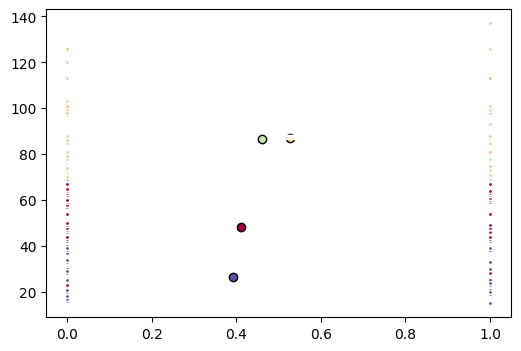

In [62]:
"""
we suppose that the Cluster_number is 4 and in this state :
we have 4 group , the model will divde on based it ...
plot the centers of cluster ...
"""
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)
# Plot the data points
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means.cluster_centers_)), colors):
    my_members = (k_means.labels_ == k)
    cluster_center = k_means.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

In [63]:
"now , we add labels to my data and classify my data to any group belong to it "
customer["Clus_km"] = labels
customer.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


In [52]:
"Group into four groups"
customer.groupby('Clus_km').mean()

<ipython-input-52-cfe06a438cfb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer.groupby('Clus_km').mean()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,
0,70.97,39.200000,48.260000,56.480000
1,162.00,32.692308,86.538462,82.128205
2,162.00,40.394737,87.000000,18.631579
3,23.00,45.217391,26.304348,20.913043


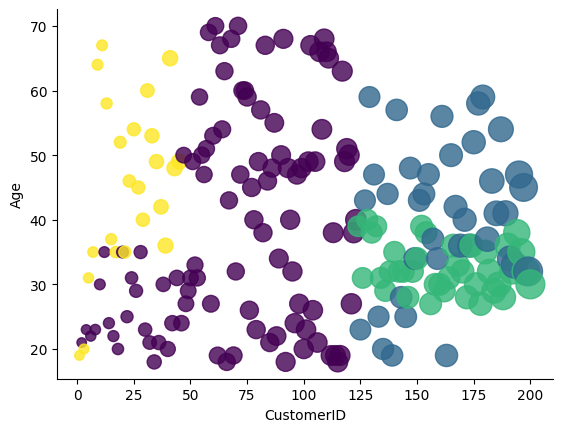

In [64]:
"visulize how to distribute point on centers"
area = np.pi * ( X[:, 1])
customer.plot(kind='scatter', x='CustomerID', y='Age', s=area, c=labels.astype(float) , alpha=.8 ,)
plt.gca().spines[['top', 'right',]].set_visible(False)

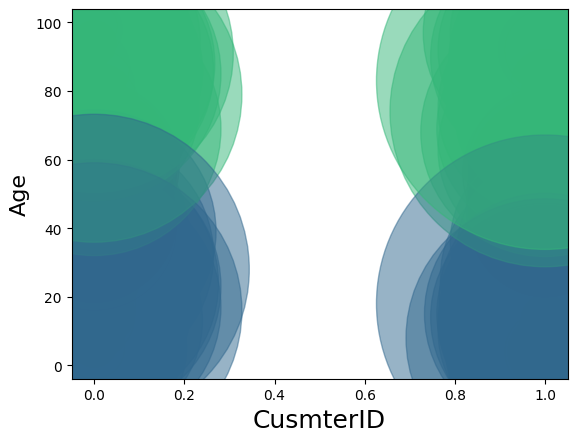

In [65]:
"visulize how to distribute point on centers for four groub"
area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 2], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('CusmterID', fontsize=18)
plt.ylabel('Age', fontsize=16)

plt.show()